### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [227]:
data = pd.read_csv('data/coupons.csv')

In [228]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [229]:
print(f"Data Shape: {data.shape}")
print('=' * 50)

# Calculate the missing count in each column,the returned 'missing_data' is a series
missing_data = data.isnull().sum()
print(f"Missing Values in each Column:\n{missing_data[missing_data > 0].sort_values(ascending=False)}")
print('=' * 50)

# Find out the unique values for each columns
col = data.select_dtypes(include='object').columns
print(type(col))
print("Number of Unique Value in categorical columns:")
for c in col:
    print(f"{c}: {data[c].nunique()}")
print('=' * 50)

Data Shape: (12684, 26)
Missing Values in each Column:
car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
dtype: int64
<class 'pandas.core.indexes.base.Index'>
Number of Unique Value in categorical columns:
destination: 3
passanger: 4
weather: 3
time: 5
coupon: 5
expiration: 2
gender: 2
age: 8
maritalStatus: 5
education: 6
occupation: 25
income: 9
car: 5
Bar: 5
CoffeeHouse: 5
CarryAway: 5
RestaurantLessThan20: 5
Restaurant20To50: 5


3. Decide what to do about your missing data -- drop, replace, other...

In [230]:
# The top column with missing values in "car" > 90%, we need to drop it first
data_new = data.drop(columns=['car'])

# Replace the missing values with 'unknown' for rest columns
for c in col:
    if c != 'car':
        data_new[c] = data_new[c].fillna('unknown')

# Confirm the missing values have been removed
print(F"The Number of missing values after cleaning: {np.sum(data_new.isnull().sum())}")


The Number of missing values after cleaning: 0


4. What proportion of the total observations chose to accept the coupon?



In [231]:
acceptance_rate = data_new['Y'].mean() * 100
print(f"Overall coupon acceptace rate: {acceptance_rate:.2f} %")

Overall coupon acceptace rate: 56.84 %


5. Use a bar plot to visualize the `coupon` column.

coupon
Bar                      0.410015
Carry out & Take away    0.735478
Coffee House             0.499249
Restaurant(20-50)        0.441019
Restaurant(<20)          0.707107
Name: Y, dtype: float64


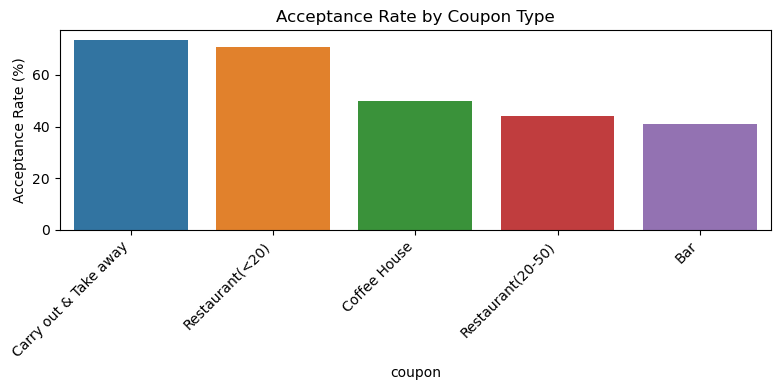

In [232]:
# Visualize the distribution of coupon column using Seaborn
print(data_new.groupby('coupon')['Y'].mean())
coupon_accept = (data_new.groupby('coupon')['Y'].mean() *100).sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=coupon_accept.index, y=coupon_accept.values, hue=coupon_accept.index)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Acceptance Rate (%)')
plt.title('Acceptance Rate by Coupon Type')
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

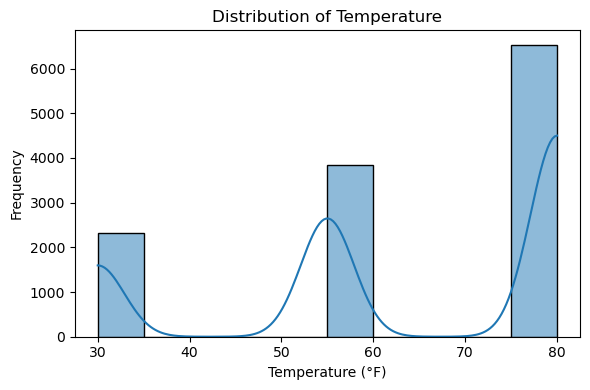

In [190]:
# Histogram of the temperature column
plt.figure(figsize=(6, 4))
sns.histplot(data_new['temperature'], bins=10, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Acceptance rate by passenger type:
passanger
Friend(s)    67.343845
Partner      59.534884
Alone        52.580424
Kid(s)       50.497018
Name: Y, dtype: float64


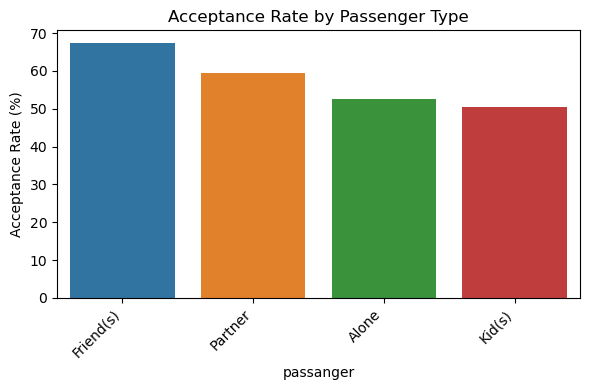

In [191]:
# Acceptance rate by passenger type
pass_accept = data_new.groupby('passanger')['Y'].mean().sort_values(ascending=False) * 100
print("Acceptance rate by passenger type:")
print(pass_accept)

plt.figure(figsize=(6, 4))
sns.barplot(x=pass_accept.index, y=pass_accept.values, hue=pass_accept.index)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Acceptance Rate (%)')
plt.title('Acceptance Rate by Passenger Type')
plt.tight_layout()
plt.show()

Acceptance rate by age category:
age
below21    63.436929
21         59.819073
26         59.593591
46         57.580175
41         57.273559
31         54.634625
36         53.525398
50plus     50.894855
Name: Y, dtype: float64


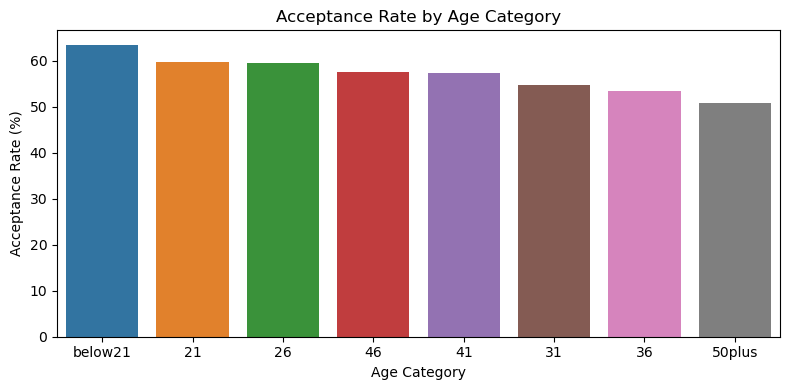

In [233]:
# Acceptance rate by age category and gender

age_accept = data_new.groupby('age')['Y'].mean().sort_values(ascending=False) * 100
print("Acceptance rate by age category:")
print(age_accept)

plt.figure(figsize=(8, 4))
sns.barplot(x=age_accept.index.astype(str), y=age_accept.values, hue=age_accept.index.astype(str))
plt.ylabel('Acceptance Rate (%)')
plt.title('Acceptance Rate by Age Category')
plt.xlabel('Age Category')
plt.tight_layout()
plt.show()

Acceptance rate by gender:
gender
Female    54.722777
Male      59.079864
Name: Y, dtype: float64


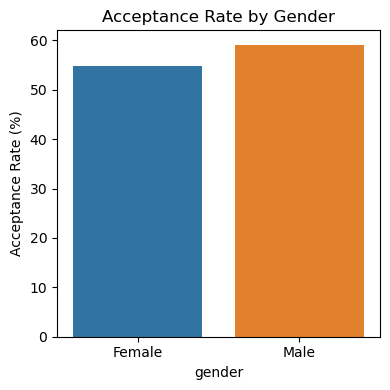

In [234]:
# Acceptance rate by gender
gender_accept = data.groupby('gender')['Y'].mean() * 100
print("Acceptance rate by gender:")
print(gender_accept)

plt.figure(figsize=(4, 4))
sns.barplot(x=gender_accept.index, y=gender_accept.values, hue=gender_accept.index)
plt.ylabel('Acceptance Rate (%)')
plt.title('Acceptance Rate by Gender')
plt.tight_layout()
plt.show()

Acceptance rate by time of day:
time
2PM     0.661523
10AM    0.608352
6PM     0.584520
10PM    0.508475
7AM     0.502212
Name: Y, dtype: float64


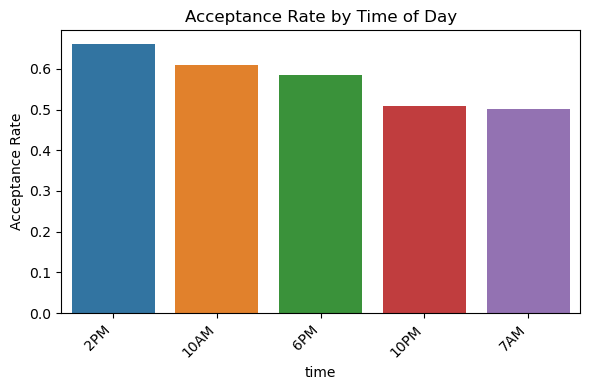

In [235]:
# Acceptance rate by time of day and weather conditions
# Time of day (morning, afternoon, evening, etc.) may influence acceptance

time_accept = data.groupby('time')['Y'].mean().sort_values(ascending=False)
print("Acceptance rate by time of day:")
print(time_accept)

plt.figure(figsize=(6, 4))
sns.barplot(x=time_accept.index, y=time_accept.values, hue=time_accept.index)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate by Time of Day')
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [236]:
data_bar = data_new[data_new['coupon'] == 'Bar']
print(data_bar.shape)
data_bar.head()

(2017, 25)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [237]:
bar_acceptance_rate = data_bar['Y'].mean()
print(f"Bar Coupon acceptance rate: {bar_acceptance_rate:.2%}")

Bar Coupon acceptance rate: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [238]:
# Check how many categories, returned: ['never' 'less1' '1~3' 'gt8' 'unknown' '4~8']
print(data_bar['Bar'].unique())

few_times = data_bar[data_bar['Bar'].isin(['never', 'less1', '1~3'])]
more_times = data_bar[data_bar['Bar'].isin(['4~8', 'gt8'])]

few_rate = few_times['Y'].mean()
more_rate = more_times['Y'].mean()

print(f"Acceptance rate for 3 or fewer bar visits per month: {few_rate:.2%}")
print(f"Acceptance rate for more than 3 bar visits per month: {more_rate:.2%}")

['never' 'less1' '1~3' 'gt8' 'unknown' '4~8']
Acceptance rate for 3 or fewer bar visits per month: 37.06%
Acceptance rate for more than 3 bar visits per month: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [240]:
# Define a helper function to convert age categories to numeric values


def age_to_numeric(age):
    if age == 'below21':
        return 20
    elif age == '50plus':
        return 50
    else:
        try:
            return int(age)
        except Exception:
            return np.nan


# Add a numeric age column for filtering
data_bar.loc[:, 'age_numeric'] = data_bar['age'].apply(age_to_numeric)

# Drivers who go to a bar more than once a month (1~3, 4~8, gt8)
bar_more_than_once = data_bar[data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])]
bar_more_than_once_over25 = bar_more_than_once[bar_more_than_once['age_numeric'] > 25]

# Acceptance rate for this group
rate_more_than_once_over25 = bar_more_than_once_over25['Y'].mean()

# Acceptance rate for all others in bar_data
others = data_bar.drop(bar_more_than_once_over25.index)
rate_others = others['Y'].mean()

print(f"Acceptance rate for drivers who go to bars more than once a month and are over 25: {rate_more_than_once_over25:.2%}")
print(f"Acceptance rate for all other bar coupon drivers: {rate_others:.2%}")

Acceptance rate for drivers who go to bars more than once a month and are over 25: 69.52%
Acceptance rate for all other bar coupon drivers: 33.50%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [241]:
# Compare acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid
# and had occupations other than farming, fishing, or forestry

# Drivers who go to bars more than once a month
bar_more = data_bar[data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])]

# Filter passengers not a kid and occupation not farming/fishing/forestry
special_group = bar_more[(bar_more['passanger'] != 'Kid(s)') & (bar_more['occupation'] != 'Farming Fishing & Forestry')]

special_rate = special_group['Y'].mean()

# Acceptance rate for all others in bar_data
other_rate = data_bar.drop(special_group.index)['Y'].mean()

print(f"Acceptance rate for drivers who go to bars more than once a month with no kid passengers and non-farming occupations: {special_rate:.2%}")
print(f"Acceptance rate for all other bar coupon drivers: {other_rate:.2%}")

Acceptance rate for drivers who go to bars more than once a month with no kid passengers and non-farming occupations: 71.32%
Acceptance rate for all other bar coupon drivers: 29.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [245]:
# Prepare numeric age column if not already present
def age_to_numeric(age):
    if age == 'below21':
        return 20
    elif age == '50plus':
        return 50
    else:
        try:
            return int(age)
        except Exception:
            return np.nan


data_bar.loc[:, 'age_numeric'] = data_bar['age'].apply(age_to_numeric)

# Condition 1: bar > once, passenger not kid, not widowed
bar_more = data_bar[data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])]
cond1 = bar_more[(bar_more['passanger'] != 'Kid(s)') & (bar_more['maritalStatus'] != 'Widowed')]

# Condition 2: bar > once and age < 30
cond2 = bar_more[bar_more['age_numeric'] < 30]

# Condition 3: cheap restaurants more than 4 times and income > $50K
# print(data_bar['income'].unique())  # to check the total category
high_income_levels = ['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']
cond3 = data_bar[(data_bar['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (data_bar['income'].isin(high_income_levels))]

# Combine all three conditions
combined_indices = cond1.index.union(cond2.index).union(cond3.index)
combined_group = data_bar.loc[combined_indices]

# Acceptance rate for the combined group
combined_rate = combined_group['Y'].mean()

# Acceptance rate for the rest
rest = data_bar.drop(combined_indices)
rest_rate = rest['Y'].mean()

print(f"Acceptance rate for drivers meeting any of the three conditions: {combined_rate:.2%}")
print(f"Acceptance rate for the rest of bar coupon drivers: {rest_rate:.2%}")


Acceptance rate for drivers meeting any of the three conditions: 57.26%
Acceptance rate for the rest of bar coupon drivers: 29.72%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [246]:
# Hypothesis about drivers who accepted the bar coupons
print(
    """
    Based on the above analyses, several patterns emerge among drivers who accept bar coupons:
    1. Drivers who already visit bars frequently (more than once a month) tend to accept bar coupons at higher rates.
    2. Acceptance increases for those who are over 25 years old, suggesting that older drivers may be more inclined to take advantage of bar-related offers.
    3. Drivers travelling without kids and working outside of farming, fishing or forestry occupations are more responsive to bar coupons.
    4. Combining multiple factors (frequent bar visits, not widowed, younger than 30, higher restaurant spending and higher income) further boosts the acceptance rate.
    These trends suggest that bar coupons are most appealing to adults who regularly engage in social drinking, have disposable income, and do not have young passengers to worry about.
    """)



    Based on the above analyses, several patterns emerge among drivers who accept bar coupons:
    1. Drivers who already visit bars frequently (more than once a month) tend to accept bar coupons at higher rates.
    2. Acceptance increases for those who are over 25 years old, suggesting that older drivers may be more inclined to take advantage of bar-related offers.
    3. Drivers travelling without kids and working outside of farming, fishing or forestry occupations are more responsive to bar coupons.
    4. Combining multiple factors (frequent bar visits, not widowed, younger than 30, higher restaurant spending and higher income) further boosts the acceptance rate.
    These trends suggest that bar coupons are most appealing to adults who regularly engage in social drinking, have disposable income, and do not have young passengers to worry about.
    


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [248]:
# Independent Investigation: analyze the Coffee House coupons
# Create a DataFrame for Coffee House coupons
coffee_data = data_new[data_new['coupon'] == 'Coffee House'].copy()
print(f"Number of coffee house coupon observations: {len(coffee_data)}")

# Overall acceptance rate for coffee house coupons
coffee_accept_rate = coffee_data['Y'].mean()
print(f"Coffee House coupon acceptance rate: {coffee_accept_rate:.2%}")


Number of coffee house coupon observations: 3996
Coffee House coupon acceptance rate: 49.92%


Acceptance rate by CoffeeHouse visit frequency:
CoffeeHouse
4~8        0.685874
gt8        0.657895
1~3        0.647793
less1      0.481860
unknown    0.458333
never      0.188781
Name: Y, dtype: float64


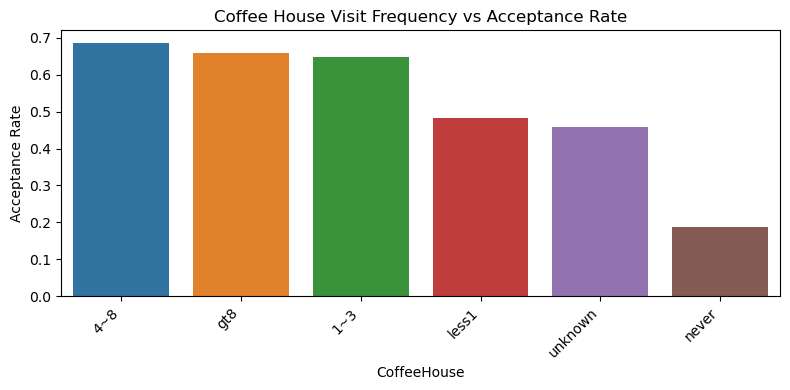

In [251]:
# Acceptance rate by coffee house visit frequency
coffee_data['CoffeeHouse'] = coffee_data['CoffeeHouse'].fillna('Unknown')

coffee_visit_accept = coffee_data.groupby('CoffeeHouse')['Y'].mean().sort_values(ascending=False)
print("Acceptance rate by CoffeeHouse visit frequency:")
print(coffee_visit_accept)

plt.figure(figsize=(8, 4))
sns.barplot(x=coffee_visit_accept.index, y=coffee_visit_accept.values, hue=coffee_visit_accept.index)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Acceptance Rate')
plt.title('Coffee House Visit Frequency vs Acceptance Rate')
plt.tight_layout()
plt.show()


Acceptance rate by passenger type (Coffee House coupons):
passanger
Friend(s)    0.596906
Partner      0.570492
Kid(s)       0.483092
Alone        0.437943
Name: Y, dtype: float64


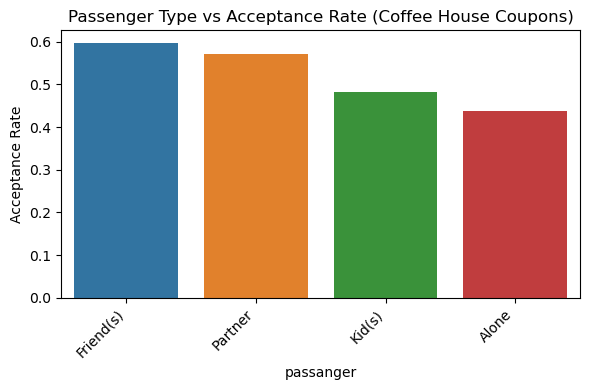

In [253]:
# Acceptance rate by passenger type for coffee house coupons
pass_accept_coffee = coffee_data.groupby('passanger')['Y'].mean().sort_values(ascending=False)
print("Acceptance rate by passenger type (Coffee House coupons):")
print(pass_accept_coffee)

plt.figure(figsize=(6, 4))
sns.barplot(x=pass_accept_coffee.index, y=pass_accept_coffee.values, hue=pass_accept_coffee.index)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Acceptance Rate')
plt.title('Passenger Type vs Acceptance Rate (Coffee House Coupons)')
plt.tight_layout()
plt.show()


Acceptance rate by income group (Coffee House coupons):
income
$87500 - $99999     0.557196
Less than $12500    0.551948
$37500 - $49999     0.542373
$12500 - $24999     0.540404
$50000 - $62499     0.503650
$100000 or More     0.494382
$25000 - $37499     0.473438
$62500 - $74999     0.436364
$75000 - $87499     0.296610
Name: Y, dtype: float64


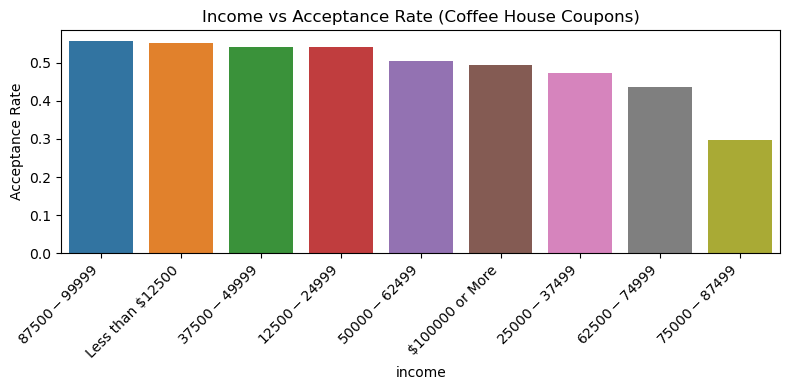

In [254]:
# Acceptance rate by income group for coffee house coupons
income_accept_coffee = coffee_data.groupby('income')['Y'].mean().sort_values(ascending=False)
print("Acceptance rate by income group (Coffee House coupons):")
print(income_accept_coffee)

plt.figure(figsize=(8, 4))
sns.barplot(x=income_accept_coffee.index, y=income_accept_coffee.values, hue=income_accept_coffee.index)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Acceptance Rate')
plt.title('Income vs Acceptance Rate (Coffee House Coupons)')
plt.tight_layout()
plt.show()


In [255]:
# Summary of independent investigation findings
print(
    """
    From our exploration of Coffee House coupons, several key insights emerge:
    
    1. Acceptance rates are highest among drivers who already frequent coffee houses multiple times per month.
    2. Drivers travelling with friends or partners are more likely to accept these coupons compared with those travelling alone or with kids.
    3. Higher income levels correlate with higher acceptance rates, suggesting disposable income plays a role in deciding to redeem a coupon.
    
    These observations indicate that Coffee House coupons are most effective among socially active drivers with higher incomes who already have a habit of visiting coffee houses.
    """)



    From our exploration of Coffee House coupons, several key insights emerge:

    1. Acceptance rates are highest among drivers who already frequent coffee houses multiple times per month.
    2. Drivers travelling with friends or partners are more likely to accept these coupons compared with those travelling alone or with kids.
    3. Higher income levels correlate with higher acceptance rates, suggesting disposable income plays a role in deciding to redeem a coupon.

    These observations indicate that Coffee House coupons are most effective among socially active drivers with higher incomes who already have a habit of visiting coffee houses.
    
